In [3]:
#Get rid of memory cached by jupyter notebook
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
#Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import os
import os.path
import random


#Set the image size and path to the data
img_size = (300,400)
img_path = 'Images/'
img_paths = []
img_annotations = {}

#The images are stored in subdirectories - go through all of them
for dirpath, dirnames, filenames in os.walk(img_path):
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        img_paths.append(os.path.join(dirpath, filename))
        if dirpath.split('/')[1].split('-')[0] not in img_annotations:
            img_annotations[dirpath.split('/')[1].split('-')[0]] = dirpath.split('/')[1].split('-')[1]

print(img_paths[0:5])


['Images/n02085620-Chihuahua\\n02085620_10074.jpg', 'Images/n02085620-Chihuahua\\n02085620_10131.jpg', 'Images/n02085620-Chihuahua\\n02085620_10621.jpg', 'Images/n02085620-Chihuahua\\n02085620_1073.jpg', 'Images/n02085620-Chihuahua\\n02085620_10976.jpg']


In [7]:
img_data = []
for path in img_paths[0:1000]:
    img_data.append(color.rgb2grey(resize(plt.imread(path).astype(np.uint8),img_size)).flatten())

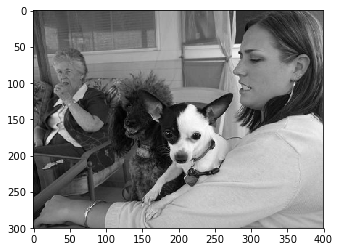

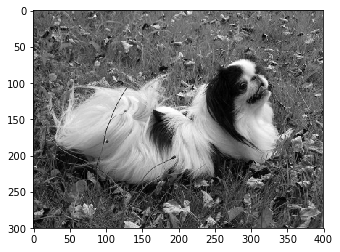

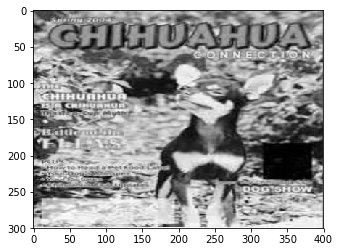

In [8]:
for i in range(3):
    plt.imshow(img_data[random.randint(0,len(img_data))].reshape(img_size),cmap='gray')
    plt.show()

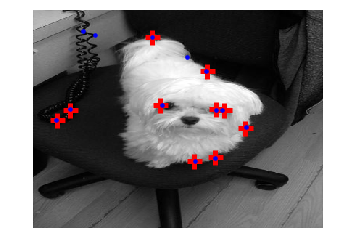

In [9]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))
image = img_data[random.randint(0,len(img_data))].reshape(img_size)
coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

plt.gray()
plt.imshow(image, interpolation='nearest')
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
plt.axis('off')
plt.show()